**스타트캠프 교육 자료 저작권 및 사용 제한 안내**
- `스타트캠프 교육 자료의 모든 권리는 저작권자에게 있습니다.`
- `이 자료는 동의없이 외부로 유출하거나 개인적인 용도로 영리적인 목적을 위해 사용할 수 없습니다.`

## GPT 4o-mini 버전 API 실습 [초급]
### API 사용법 숙지
+ [API 공식 문서](https://platform.openai.com/docs/api-reference/chat)
+ [사용 가능한 모델](https://platform.openai.com/docs/models/gpt-4o)

### GPT API 활용 사례
+ 콘텐츠 생성: 블로그 게시물, 광고 카피, 소셜 미디어 콘텐츠 생성.
+ 고객 지원: 자동 응답 봇, FAQ 응답 시스템.
+ 교육: 학습 자료 생성, 문제 풀이 설명, 힌트 제공.
+ 연구: 데이터 분석, 논문 요약, 정보 검색.

### GPT 제공 모델
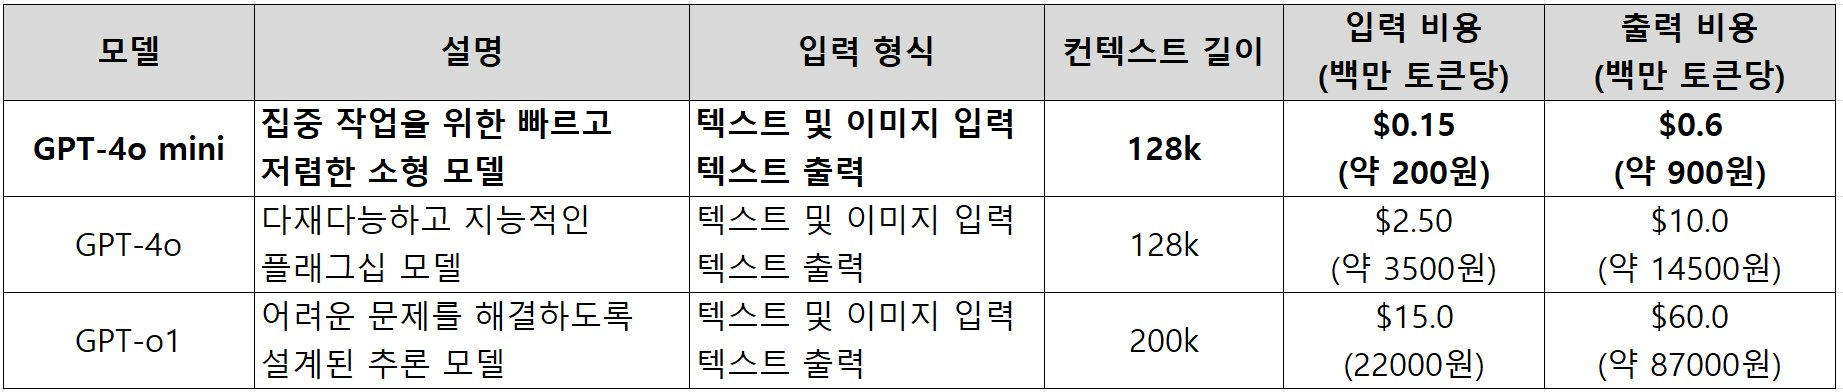


## 토큰
- **정의**: GPT와 같은 인공지능 모델에서 텍스트 데이터를 처리하고 이해하는 기본 단위 (토큰은 문장에서 단어로 생각할 수 있음)
  + 각 토큰별로 고유한 숫자가 매겨져있음.
  + 영어보다 한글 문장을 표현하는데 더 많은 토큰 소요됨.
    + 이유: 한글은 다양한 조합형 문자로 인해 많은 토큰이 필요
- **최대 입력 토큰 제한**: 각 LLM 모델마다 최대로 입력할 수 있는 토큰 수가 제한됨.
- **토큰 수 확인**: GPT의 입력한 문장에 대한 토큰 수를 확인하기 위한 사이트 [클릭](https://platform.openai.com/tokenizer)


### API 주요 파라미터
+ 필수 파라미터
  + model: 사용하고자dd하는 gpt 모델 + messages: 대화 메시지 목록
 응답의 다양성 제어 파라미터
  + temperature: 다음 토큰 예측을 위한 확률 분포를 부드럽게 하는 역할
    + 0에서 2 사이의 값을 가지며, 1.0 이상일 경우 확률 분포가 평탄해지며 더 창의적이고 예측할 수 없는 결과를 생성
  + top_p: 누적 확률을 기준으로 선택할 토큰의 범위를 제한 
    + 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델은 더 다양한 토큰을 고려

  > **낮은 temperature + 높은 top_p​**
  + temperature가 낮아 확률 분포의 차이가 더 강조됨 → 높은 확률의 단어에 집중​ 
  + top_p가 높아 누적 확률 범위가 넓음 → 상위 확률 단어들을 다양하게 고려​
    + 응답이 안정적이고 예측 가능​
  + 활용: 기술 문서 작성, 고객 지원​

  > **높은 temperature + 낮은 top_p​**
  + temperature가 높아 확률 분포가 평탄해짐 → 다양한 단어가 선택될 가능성 증가​
  + top_p가 낮아 누적 확률 범위가 좁음 → 선택 후보가 제한적​
    + 창의적이고 독창적인 응답
  + 활용: 아이디어 도출, 소설 생성


In [1]:
# 필요 라이브러리 설치
# !pip install openai

#API-KEY 설정
OPENAI_API_KEY = "OPENAI_API_KEY"

### 1. 기본 사용 방법
+ API 파라미터 숙지
+ GPT API에서 Role은 챗봇의 다양한 사용 사례에 따라 서로 다른 방식으로 응답을 생성할 수 있도록 하는 기능
```
    1. system:
      - 역할: 기본 지침을 설정하고 대화의 전체적인 방향을 설정합니다.
      - 특징: 대화의 톤, 스타일, 특정 규칙 등을 정의합니다.

    2. user:
      - 역할: 사용자의 입력을 나타냅니다.
      - 특징: 질문이나 명령 등 사용자가 챗봇에게 전달하는 메시지를 포함합니다. 챗봇은 이를 바탕으로 응답을 생성합니다.

    3. assistant:
      - 역할: 챗봇의 응답을 나타냅니다.
      - 특징: 시스템의 지침과 사용자의 입력을 토대로 생성된 응답을 나타냅니다.
```
+ `실습 내용`
  1. GPT API함수를 강사님과 함께 완성해본다.
  2. GPT API의 파라미터를 바꿔가면서 어떠한 출력이 나오는지 확인한다.
    1. max_tokens의 값을 10으로 바꾸고 어떻게 출력되는지 본다.
    2. n=2로 바꿔서 값이 어떻게 출력되는지 본다.
    3. 질문의 content를 바꿔서 출력해본다.

+ `주의 사항`
  + n값을 너무 크게 설정하면 API호출 과비용 발생 `(비용 초과 이후 실습 불가능)`

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

# 페르소나 지정 및 기존 대화 내용 저장
conversation_history = [
    {"role": "system", "content": "당신은 사용자 질문에 답변하는 챗봇입니다."},
    {"role": "system", "content": "답변은 사용자가 읽기 쉽도록 마크다운 형태로 정리해서 출력해줘."},
]
# 질문
conversation_history.append(
    {
        "role": "user",
        "content": "오늘 달달하고 매콤한 것을 먹고 싶은데, 점심 메뉴 추천해줄래?",
    }
)

# API 호출
'''
************************
** GPT의 응답을 얻기 위한 함수 작성 **
************************
'''

# 응답 출력
for response in response.choices :
  print(f"Assistant: {response.message.content}")

+ `실습 내용`
  + **응답의 다양성 테스트 실습**
  + 같은 프롬프트를 넣었을 때 응답이 얼마나 달라지는지 확인한다.
    + 예시 프롬프트 ) "국물이 있는 점심 메뉴 추천해줘"
    1. top_p=0.5로 고정한 후 아래와 같이 설정한 경우 응답이 얼마나 달라지는지 확인해본다.
      + temperature=0 : 동일한 프롬프트에 대해 응답이 동일한지 확인
      + temperature=1 : 동일한 프롬프트에 대해 응답이 달라지는지 확인
      + temperature=2 : 동일한 프롬프트에 대해 응답이 얼마나 달라지는지 확인
    2. top_p=1.0, temperature=1.8로 설정 후 응답이 어떻게 출력되는지 관찰한다.
      + `응답이 이상하게 나온다면 그 이유에 대해 생각해본다`

  ---

 + Single-turn 대화 : 한 번의 질문과 한 번의 응답으로 이루어진 대화 형태 (이전 대화 내용 기억 못함)
  + 아래 예시 코드는 사용자 질문과 GPT 답변을 저장하지 않으므로 싱글-턴 대화임

In [ ]:
#Single-turn 대화 : 한 번의 질문과 한 번의 응답으로 이루어진 대화 형태 (이전 대화 내용 기억 못함)
from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

# '종료' 입력 전까지 대화
user_input = ''
while True:
    user_input = input("You: ")
    if "종료" in user_input : break
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": user_input}],
        temperature=1.0,  # 확률 분포 조정을 통한 응답의 다양성 제어 (값의 범위: 0~2)
        top_p=0.5,  # 누적 확률 값을 통한 응답의 다양성 제어 (값의 범위: 0~1)
        max_tokens=500,# 생성될 응답의 최대 토큰 수
    )

    assistant_reply = response.choices[0].message.content
    print(f"Assistant: {assistant_reply}")

### 2. 이어서 대화화기 [Multi-turn 대화]
+ GPT가 이전 대화를 기억함으로써 대화의 맥락을 파악하여 답변.

---
+ `실습 내용`
  1. 아래 실습 코드에서 멀티턴 대화를 위해 실습 코드를 완성해본다.
  2. 완성한 실습 코드를 통해 멀티턴 대화를 해본다.
    + 이전 대화를 잘 기억해서 답변하는지 확인
    + 예시 프롬프트
      1. 훌륭한 개발자로서 잘 성장하기 위해서 무엇이 필요할까?
      2. 위의 내용을 한 문장으로 표현해줄래?

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

conversation_history = [
    {"role": "system", "content": "당신은 사용자 질문에 답변하는 챗봇입니다."},
    {"role": "system", "content": "답변은 사용자가 읽기 쉽도록 마크다운 형태로 정리해서 출력하세요."},
]

# '종료' 입력 전까지 대화
user_input = ''
while True:
    user_input = input("You: ")
    if "종료" in user_input : break

    # ***** 실습 *****
    # ** 아래 코드 한줄 수정 **
    conversation_history.append()

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=conversation_history,
        temperature=0.3,  # 확률 분포 조정을 통한 응답의 다양성 제어 (값의 범위: 0~2)
        top_p=0.5,  # 누적 확률 값을 통한 응답의 다양성 제어 (값의 범위: 0~1)
        max_tokens=500,# 생성될 응답의 최대 토큰 수,
    )

    # ***** 실습 *****
    # response 구조 확인 후, 대화 내역 기록록
    
    print(f"Assistant: {assistant_reply}")

### 3. 외부 지식 기반으로 신뢰성있는 답변받기
+ 실습
  1. 위키피디아의 정보를 잘 가지고 오는지 `page_title`의 변수 값을 바꿔가보면서 출력되는 내용을 확인한다.
  2. GPT에게 질문할 내용을 위키피디아의 검색어로 사용할 수 있도록 GPT를 통해 질문의 키워드를 추출한다.
  3. 완성된 실습 코드에서 아래와 같은 예시 프롬프트로 실습해본다.
    + 위키피디아에 있는 정보 : 마이크로소프트의 최신 기술에 대해 알려줘.
    + 위키피디아에 없는 정보 : 사과 회사에 대한 핵심 기술에 대해 알려줘

In [ ]:
#위키피디아 라이브러리 설치
!pip install wikipedia-api

In [ ]:
import wikipediaapi

# 위키피디아 API 클라이언트 생성
wiki_wiki = wikipediaapi.Wikipedia(language='ko',
                                   user_agent='Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36')

def get_wikipedia_content(page_title):
    page = wiki_wiki.page(page_title)

    if not page.exists():
        return f"Page '{page_title}' does not exist."

    return {
        "url": page.fullurl,
        "title": page.title,
        "summary": page.summary,
        # "content": page.text
    }

# 예제 페이지 가져오기
page_title = "세종대왕"
content = get_wikipedia_content(page_title)

# 결과 출력
print("Url: ", content["url"])
print("Title: ", content["title"])
print("Summary: ", content["summary"])
# print("Content: ", content["content"])

+ GPT활용 사용자 질문에 대한 핵심 키워드 추출

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

def extract_keywords_by_gpt(user_input):

  # API 호출
  response = client.chat.completions.create(
      model="gpt-4o-mini",  # 사용하려는 모델 (필수 지정)
      messages=[
        {"role": "system", "content": "당신은 위키피디아에 검색할 중요 키워드를 추출하는 도우미입니다."},
        {"role": "system", "content": "사용자 질문에 대해 절대 답하지 마세요."},
        {"role": "system", "content": "사용자 질문을 근거로 핵심 키워드 단어 하나를 추출하세요."},
        {"role": "system", "content": "하나의 키워드 이외의 다른 답변은 절대 하지마세요."},
        {"role": "user", "content": f"사용자 질문:{user_input}"},
        {"role": "user", "content": f"핵심 키워드: "}
      ],
      temperature=0.1,  # 확률 분포 조정을 통한 응답의 다양성 제어 (값의 범위: 0~2)
      top_p=0.1,  # 누적 확률 값을 통한 응답의 다양성 제어 (값의 범위: 0~1)
  )

  keywords = response.choices[0].message.content.strip()
  return keywords

# 응답 출력
user_input = input("질문: ")
print("추출한 키워드 :", extract_keywords_by_gpt(user_input))

+ 완성 코드

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

conversation_history = [
    {"role": "system", "content": "당신은 사용자 질문에 답변하는 챗봇입니다."},
    {"role": "system", "content": "답변은 사용자가 읽기 쉽도록 마크다운 형태로 정리해서 출력하세요."},
]

# '종료' 입력 전까지 대화
user_input = ''
while True:
    user_input = input("You: ")
    if "종료" in user_input : break
    user_keyword = extract_keywords_by_gpt(user_input) #질문 핵심 키워드 추출
    wiki_info = get_wikipedia_content(user_keyword) #위키피디아 정보 가져오기
    conversation_history.append({"role": "system", "content": "사용자 질문에 대해 위키피디아 정보가 있다면 아래의 정보를 근거로 답변하세요."})
    conversation_history.append({"role": "system", "content": "위키피디아 정보의 출처도 반드시 명시해주세요."})
    conversation_history.append({"role": "system", "content": f"#위키피디아 정보: {wiki_info}"})
    conversation_history.append({"role": "system", "content": "위키피디아 정보가 없다면 위키피디아에서 찾을 수 없다고 답변하고 조금 더 자세한 질문을 하도록 요구하세요."})

    conversation_history.append({"role": "user", "content": user_input})

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=conversation_history
    )

    assistant_reply = response.choices[0].message.content
    conversation_history.append({"role": "assistant", "content": assistant_reply})

    print(f"Assistant: {assistant_reply}")

### 참고
+ 최대 입력 토큰을 넘어서는 입력을 했을 때 API호출 오류가 발생합니다.
+ 해결책: 최대 입력 토큰을 넘어서지 않을 만큼만 최신 대화 내용을 GPT의 입력으로 넣을 수 있도록 한다.

In [ ]:
#토큰수 계산을 위한 라이브러리 설치
!pip install tiktoken

In [ ]:
from openai import OpenAI
from collections import deque
import tiktoken

client = OpenAI(api_key=OPENAI_API_KEY)

# Tokenizer 설정 (gpt-4o-mini의 경우)
encoding = tiktoken.encoding_for_model("gpt-4o-mini")

MAX_TOKENS = 8192  # GPT-4o-mini의 최대 토큰 수
CONTEXT_LIMIT = 4096 # 사용할 컨텍스트의 토큰 수 제한 (여유를 두기 위함)

conversation_history = deque([
    {"role": "system", "content": "당신은 사용자 질문에 답변하는 챗봇입니다."},
    {"role": "system", "content": "답변은 사용자가 읽기 쉽도록 마크다운 형태로 정리해서 출력하세요."},
])

def num_tokens_from_messages(messages):
    num_tokens = 0
    for message in messages:
        # 각 메시지의 토큰 수를 계산합니다
        num_tokens += len(encoding.encode(message["content"]))
    print(num_tokens)
    return num_tokens

# '종료' 입력 전까지 대화
user_input = ''
while True:
    user_input = input("You: ")
    if "종료" in user_input:
        break
    conversation_history.append({"role": "user", "content": user_input})

    # 이전 대화가 CONTEXT_LIMIT를 넘어서면 오래된 순으로 제거
    while num_tokens_from_messages(conversation_history) > CONTEXT_LIMIT:
        conversation_history.popleft()

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=list(conversation_history)
    )

    assistant_reply = response.choices[0].message.content
    conversation_history.append({"role": "assistant", "content": assistant_reply})

    print(f"Assistant: {assistant_reply}")
